In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

import config

In [14]:
model = 'LR(E)'
opt = config.VAE_fmnist

indist_ = np.load(f'./npy/{model}/{opt.train_dist}_{opt.train_dist}.npy')
for ood in opt.ood_list:
    ood_ = np.load(f'./npy/{model}/{opt.train_dist}_{ood}.npy')
    combined = np.concatenate((indist_, ood_))
    label_1 = np.ones(len(indist_))
    label_2 = np.zeros(len(ood_))
    label = np.concatenate((label_1, label_2))
    fpr, tpr, thresholds = metrics.roc_curve(label, combined, pos_label=0)
    aucroc = metrics.auc(fpr, tpr)
    print(ood, aucroc)

fmnist 0.5
svhn 0.9999171200000001
celeba 0.9988718799999999
lsun 0.9965716
cifar10 0.99546224
mnist 0.9637465
kmnist 0.9907393199999999
omniglot 1.0
notmnist 0.9998049599999999
noise 0.9969882200000001
constant 0.9980674799999999
overall 0.9937179599999998


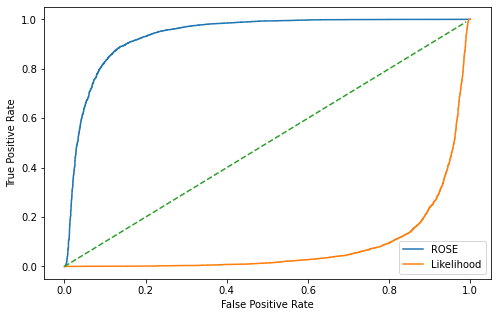

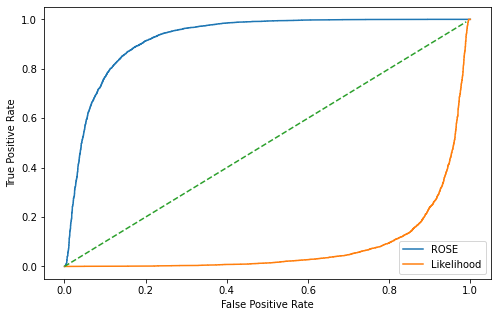

0.9236961799999999 0.08089798000000001


In [31]:
model = 'VAE'
opt = config.VAE_cifar10
ood = 'svhn'

auroc_vanilla = {}
auroc_smw = {}

for method in ['Vanilla', 'SMW']:
    # ROSE -> AUROC
    indist_ = np.load(f'./npy/FINAL_ROSE/{model}_{opt.train_dist}/{opt.train_dist}_{opt.train_dist}_{method}.npy')
    ood_ = np.load(f'./npy/FINAL_ROSE/{model}_{opt.train_dist}/{opt.train_dist}_{ood}_{method}.npy')
    combined = np.concatenate((indist_, ood_))
    label_1 = np.ones(len(indist_))
    label_2 = np.zeros(len(ood_))
    label = np.concatenate((label_1, label_2))
    fpr1, tpr1, thresholds1 = metrics.roc_curve(label, combined, pos_label=0)
    aucroc1 = metrics.auc(fpr1, tpr1)
    # VAE NLL -> AUROC
    indist_ = np.load(f'./npy/VAE_NLL/{opt.train_dist}_{opt.train_dist}_nll.npy')
    ood_ = np.load(f'./npy/VAE_NLL/{opt.train_dist}_{ood}_nll.npy')
    combined = np.concatenate((indist_, ood_))
    label_1 = np.ones(len(indist_))
    label_2 = np.zeros(len(ood_))
    label = np.concatenate((label_1, label_2))
    fpr2, tpr2, thresholds2 = metrics.roc_curve(label, combined, pos_label=0)
    aucroc2 = metrics.auc(fpr2, tpr2)
    # Plot ROC
    fig = plt.figure(figsize=(8, 5))
    title = f'In-distribution : {opt.train_dist.upper()} / OOD : {ood.upper()} / AUROC : {aucroc:.3f}'
    p1, = plt.plot(fpr1, tpr1, label='ROSE')
    p2, = plt.plot(fpr2, tpr2, label='Likelihood')
    plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), linestyle='--')
    #plt.title(title)
    plt.grid(False)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(handles=[p1, p2], loc='lower right')
    fig.savefig(f'./images/auroc/auroc_{model}_{opt.train_dist}_{ood}_{method}.png')
    plt.show()
    if method == 'SMW':
        print(aucroc1, aucroc2)
        
